# Valores de referência de métricas

### Procedimento
- Recebe caminho para pastas com projetos e a métrica a ser avaliada
- Percorre todas as pastas nesse caminho e busca o csv daquela métrica
- Usa o pandas para salvar esse csv
- Armazena a última coluna desse csv em um array
- gera grafico de distribuição

In [1]:
import os
import csv
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from tqdm import tqdm

%matplotlib inline

In [ ]:
i = 0

In [483]:
metric = 'loc'
root_path = './../../Projetos/'
data = []
for j in tqdm(range(len(os.listdir(root_path)))):
    folder = os.listdir(root_path)[j]
    system_path = os.path.join(root_path, folder)
    metric_path = os.path.join(system_path, metric+'.csv')
    with open(metric_path, 'r') as csv_file:
        csv_reader = csv.reader(csv_file)
        for line in csv_reader:
            if(float(line[-1])!= -1 and line[-1] != 'NaN'):
                data.append(float(line[-1]))
data = np.sort(data)

  0%|          | 0/44 [00:00<?, ?it/s]


IndexError: list index out of range

In [ ]:
metric_df = pd.DataFrame(data=data, columns=[metric])
metric_df

,tryCatchQty
0,0.0
1,0.0
2,0.0
3,0.0
4,0.0
...,...
576087,21.0
576088,21.0
576089,21.0
576090,21.0


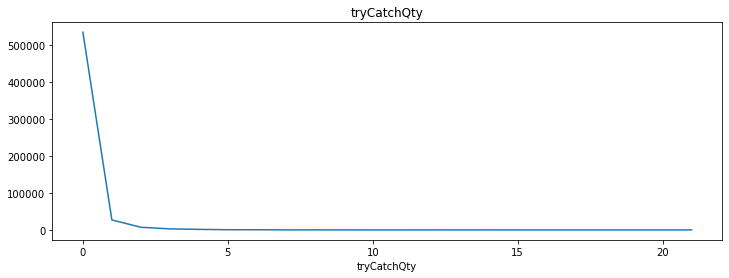

In [ ]:
metric_df[metric] = metric_df[metric].apply(pd.to_numeric)

metric_df_groups  = metric_df.groupby([metric])[metric].count()
fig,axs = plt.subplots(figsize=(12,4))
metric_df_groups.plot(ax=axs,title=metric)

fig.savefig("./Results/"+metric+".png")

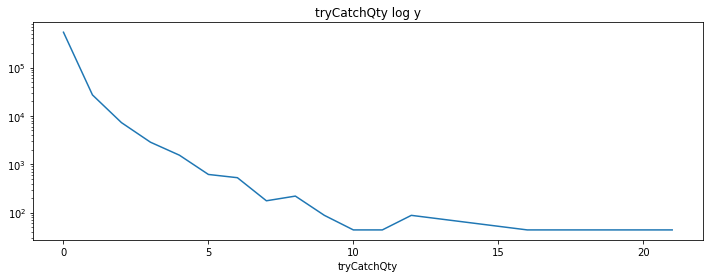

In [ ]:
fig_log,axs_log = plt.subplots(figsize=(12,4))
axs_log.set_yscale('log')
metric_df_groups.plot(ax=axs_log,title=metric + " log y")

fig_log.savefig("./Results/"+metric+"_logY.png")

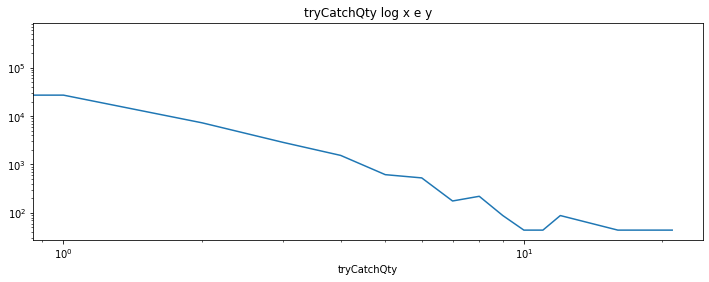

In [ ]:
fig_log,axs_log = plt.subplots(figsize=(12,4))
axs_log.set_yscale('log')
axs_log.set_xscale('log')
metric_df_groups.plot(ax=axs_log,title=metric+" log x e y")

fig_log.savefig("./Results/"+metric+"_logXY.png")

In [ ]:
metric_df_groups

tryCatchQty
0.0     535392
1.0      27104
2.0       7260
3.0       2860
4.0       1540
5.0        616
6.0        528
7.0        176
8.0        220
9.0         88
10.0        44
11.0        44
12.0        88
16.0        44
17.0        44
21.0        44
Name: tryCatchQty, dtype: int64

In [ ]:

with open("./Results/"+metric+".txt", 'w') as result_file:
    print("Average: "+str(np.average(data)), file=result_file)
    print("Standard deviation: "+str(np.std(data)), file=result_file)
    print("Percentile 70: "+str(np.percentile(data, 70)), file=result_file)
    print("Percentile 90: "+str(np.percentile(data,90)), file=result_file)

In [3]:
def resultsFind(metric:str, root_path:str):
    data = []
    for j in tqdm(range(len(os.listdir(root_path)))):
        folder = os.listdir(root_path)[j]
        system_path = os.path.join(root_path, folder)
        metric_path = os.path.join(system_path, metric+'.csv')
        with open(metric_path, 'r') as csv_file:
            csv_reader = csv.reader(csv_file)
            for line in csv_reader:
                if(float(line[-1])!= -1 and line[-1] != 'NaN'):
                    data.append(float(line[-1]))
    data = np.sort(data)
    metric_df = pd.DataFrame(data=data, columns=[metric])
    metric_df[metric] = metric_df[metric].apply(pd.to_numeric)
    metric_df_groups  = metric_df.groupby([metric])[metric].count()
    
    fig,axs = plt.subplots(figsize=(12,4))
    metric_df_groups.plot(ax=axs,title=metric)

    fig.savefig("./Results/"+metric+".png")
    
    fig_log,axs_log = plt.subplots(figsize=(12,4))
    axs_log.set_yscale('log')
    metric_df_groups.plot(ax=axs_log,title=metric + " log y")

    fig_log.savefig("./Results/"+metric+"_logY.png")

    
    fig_log,axs_log = plt.subplots(figsize=(12,4))
    axs_log.set_yscale('log')
    axs_log.set_xscale('log')
    metric_df_groups.plot(ax=axs_log,title=metric+" log x e y")

    fig_log.savefig("./Results/"+metric+"_logXY.png")

    
    
    with open("./Results/"+metric+".txt", 'w') as result_file:
        print("Average: "+str(np.average(data)), file=result_file)
        print("Standard deviation: "+str(np.std(data)), file=result_file)
        print("Percentile 70: "+str(np.percentile(data, 70)), file=result_file)
        print("Percentile 90: "+str(np.percentile(data,90)), file=result_file)
    
    
    
    

100%|██████████| 44/44 [00:34<00:00,  1.28it/s]
<ipython-input-3-b8c5c2fcfedb>:29: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig_log,axs_log = plt.subplots(figsize=(12,4))
100%|██████████| 44/44 [00:26<00:00,  1.66it/s]
<ipython-input-3-b8c5c2fcfedb>:17: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig,axs = plt.subplots(figsize=(12,4))
<ipython-input-3-b8c5c2fcfedb>:22: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and m

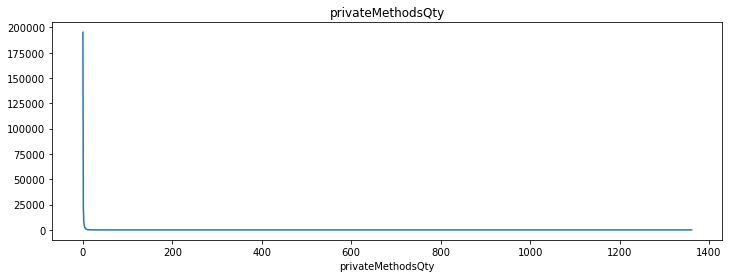

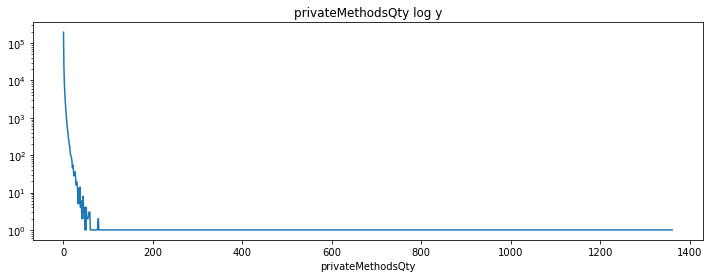

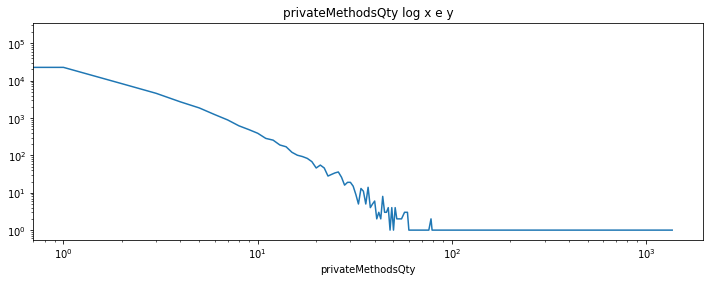

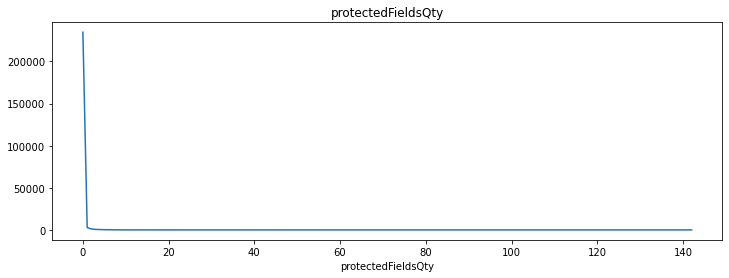

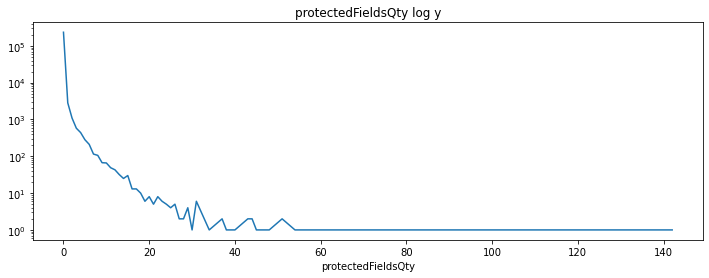

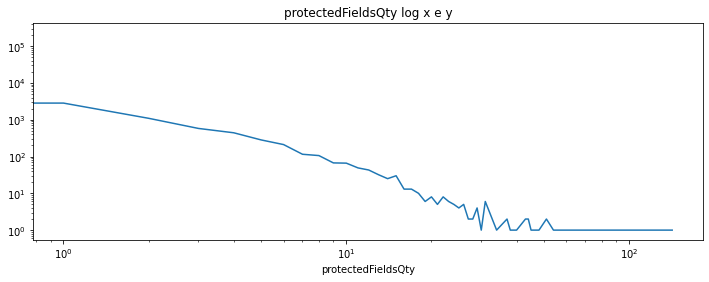

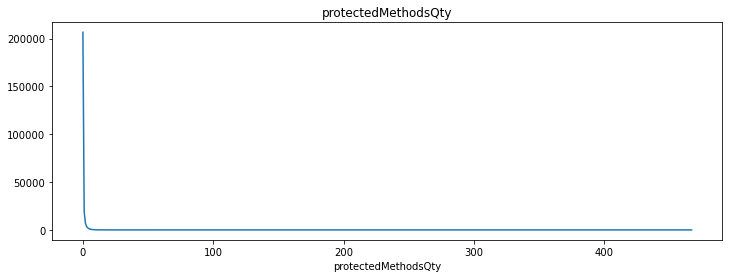

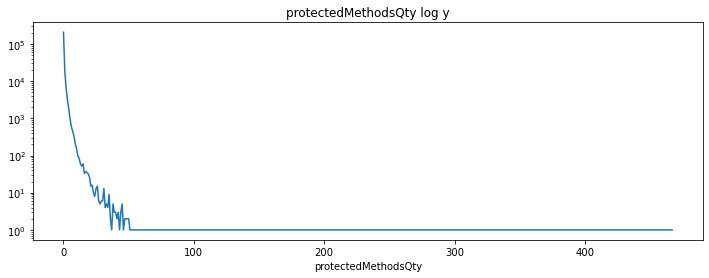

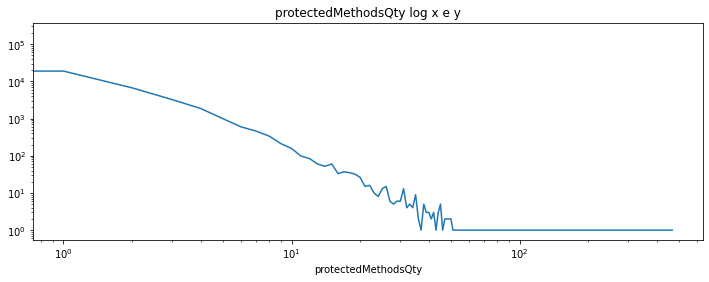

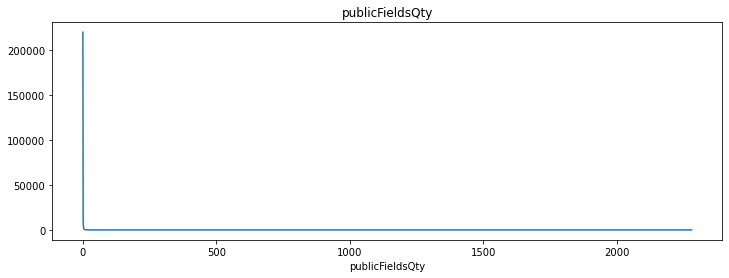

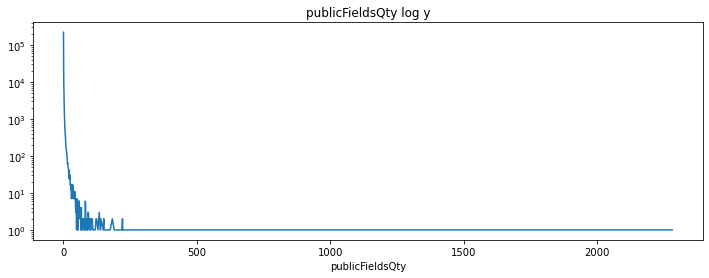

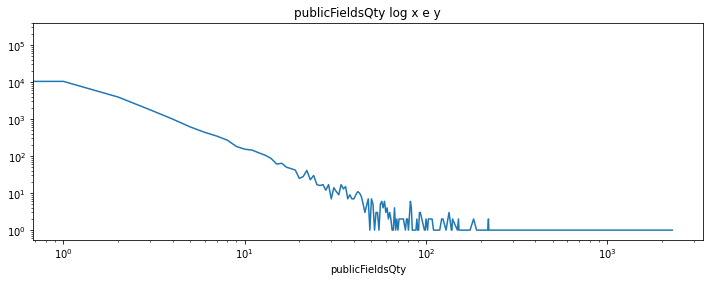

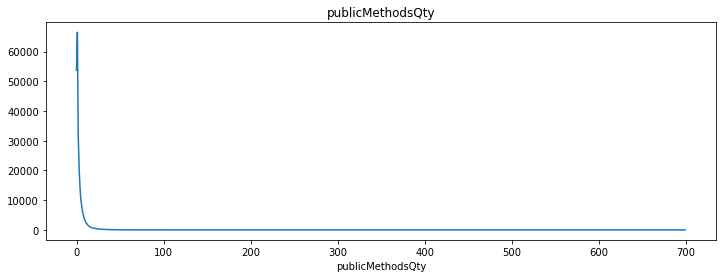

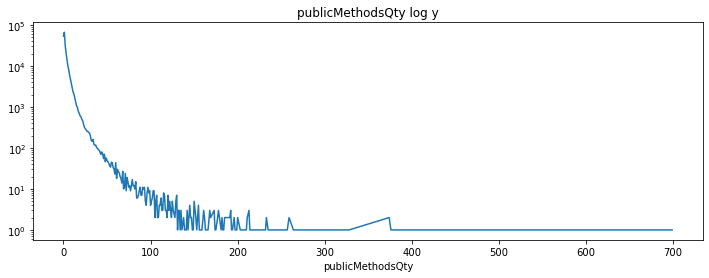

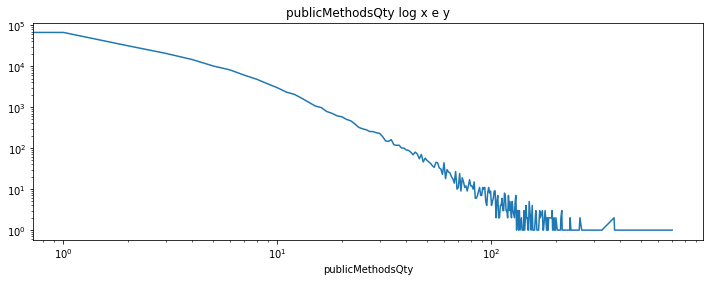

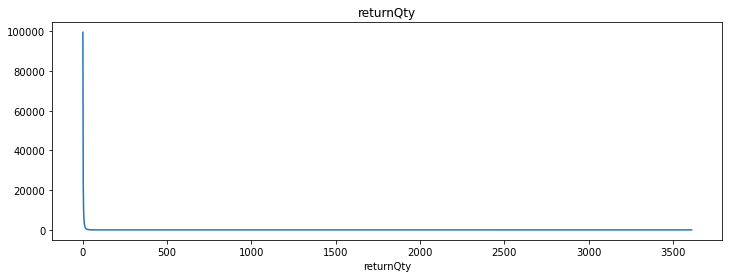

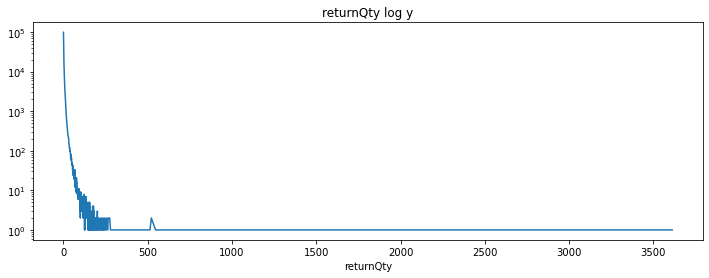

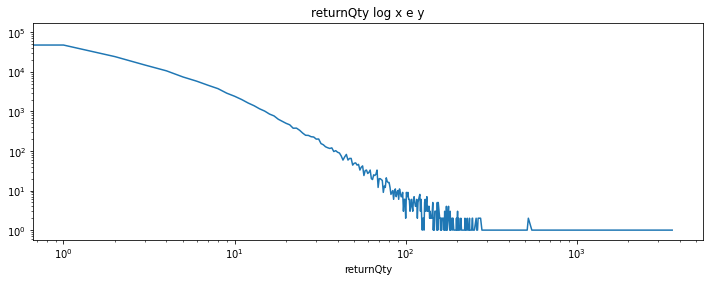

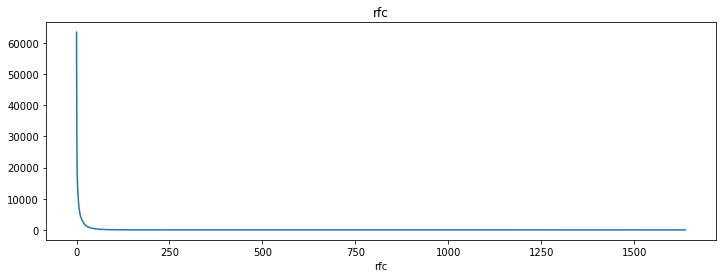

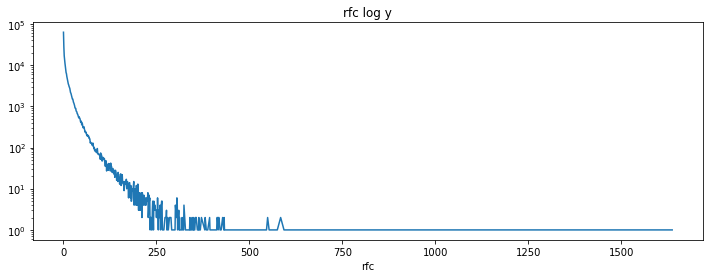

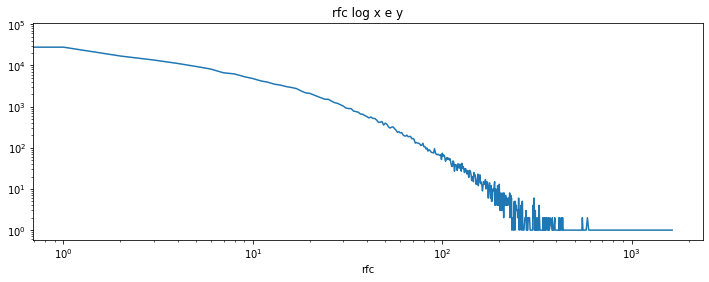

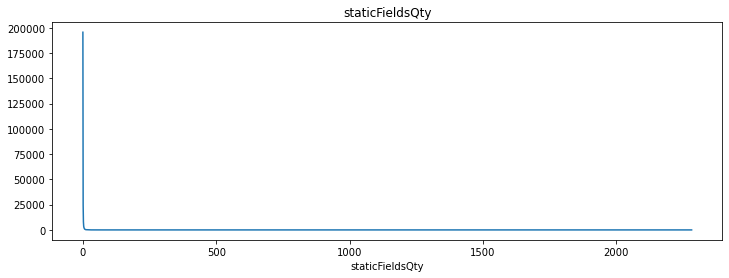

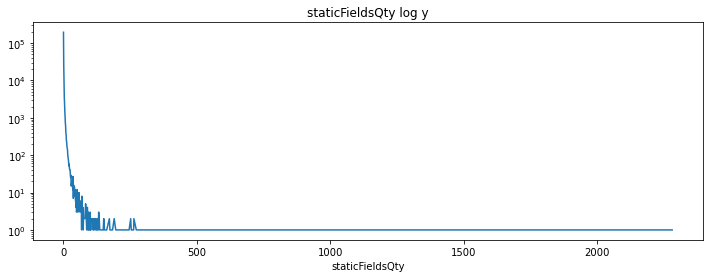

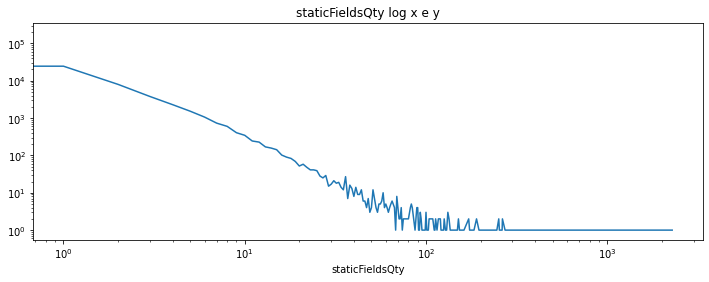

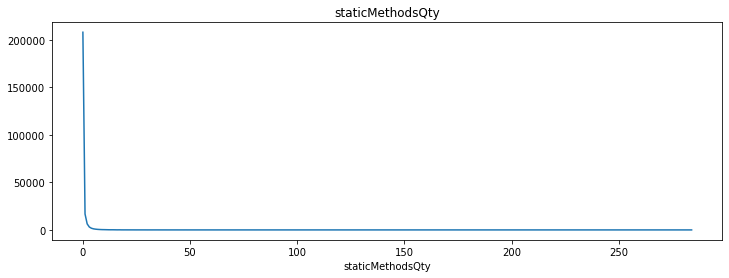

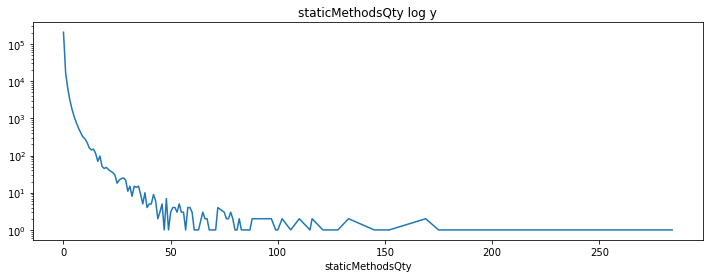

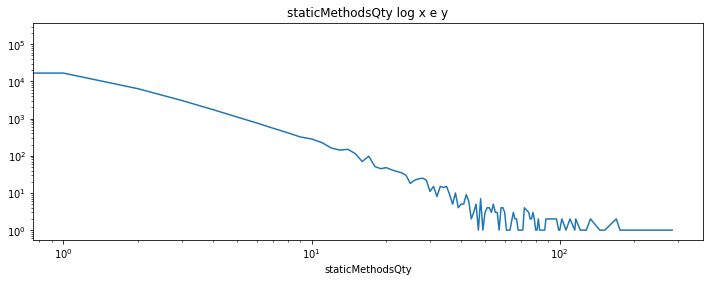

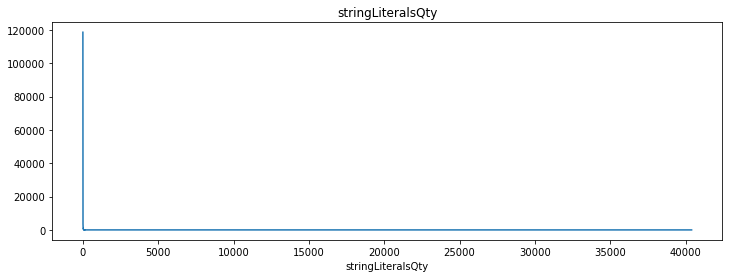

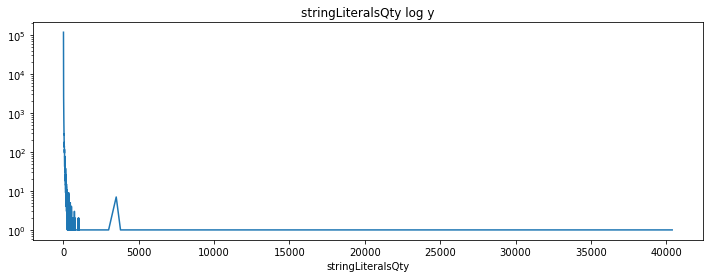

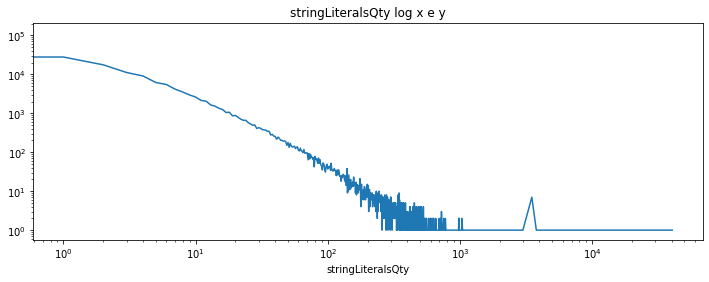

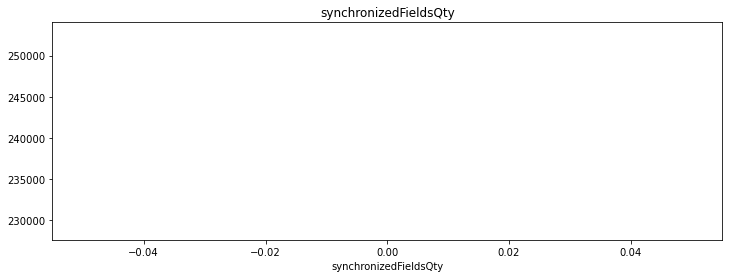

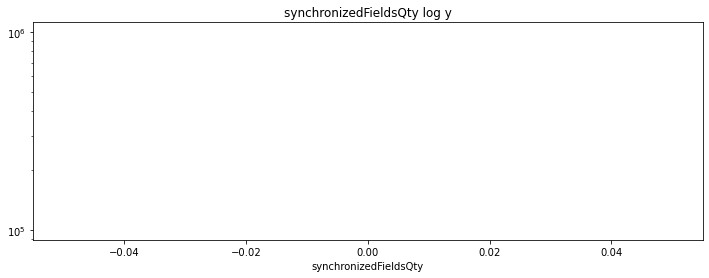

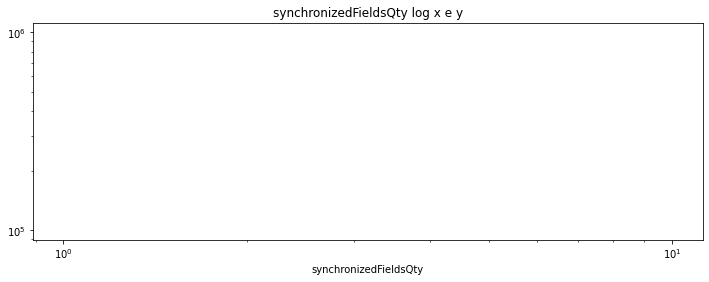

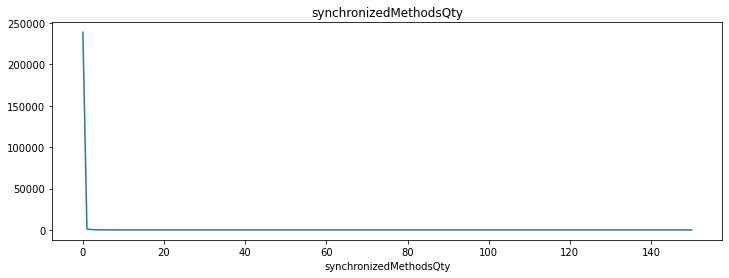

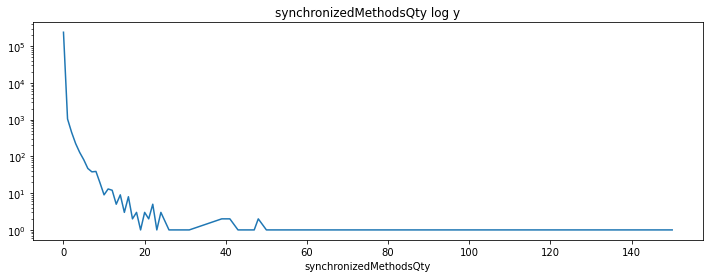

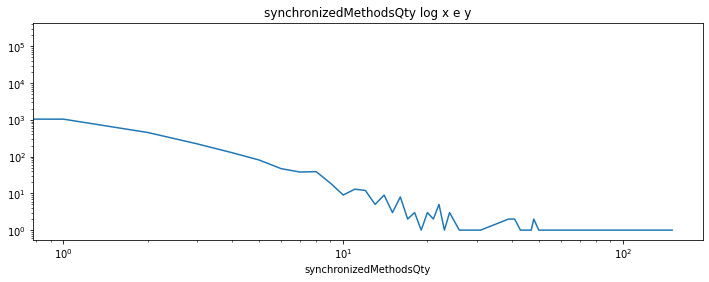

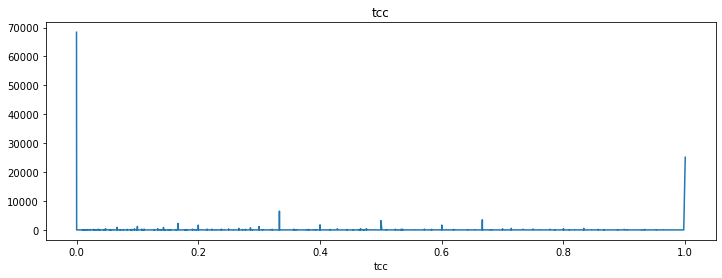

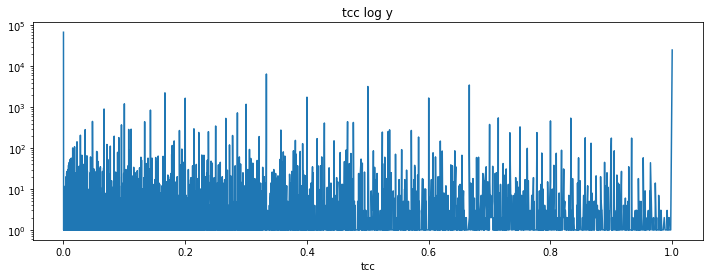

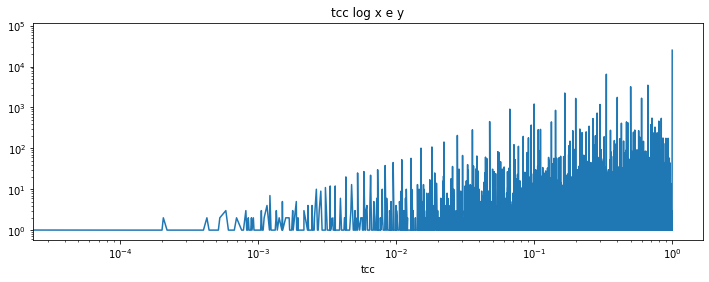

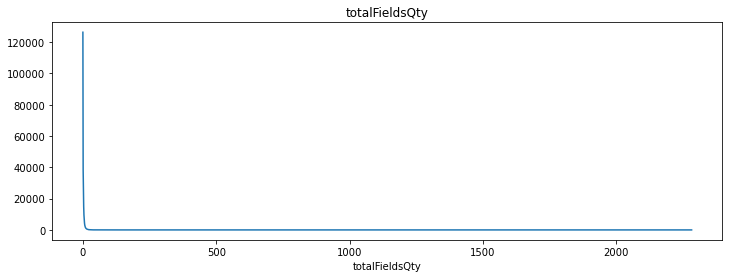

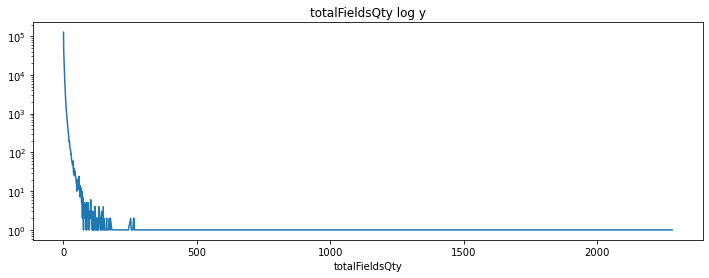

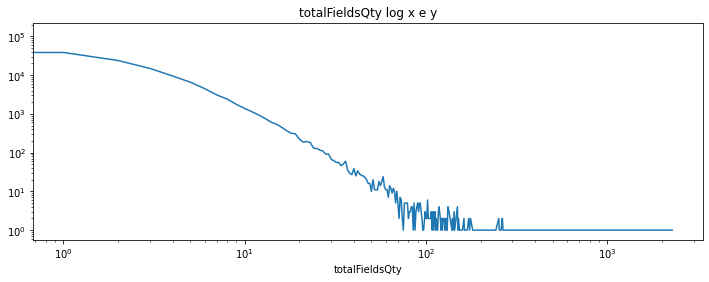

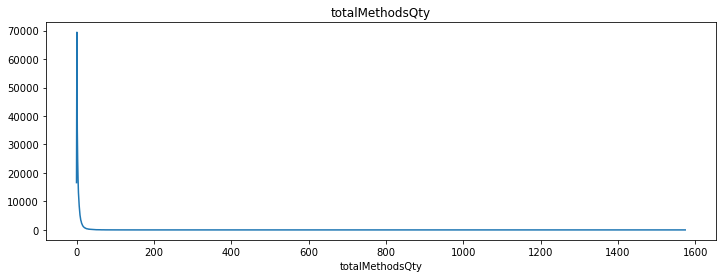

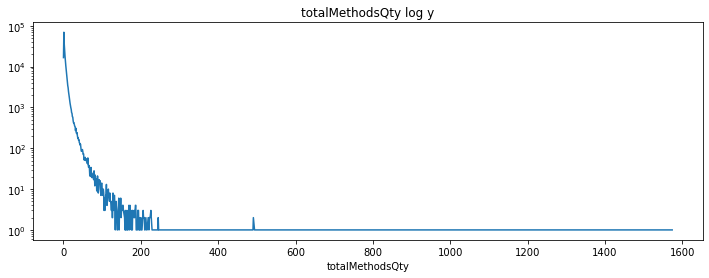

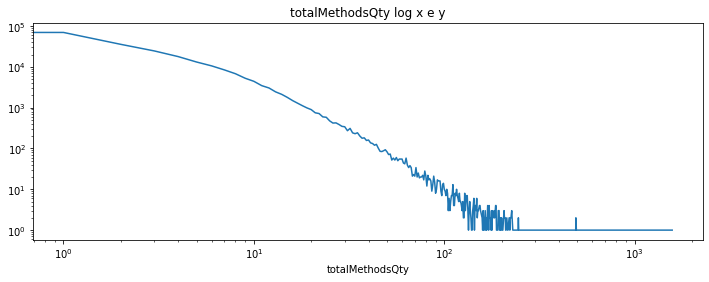

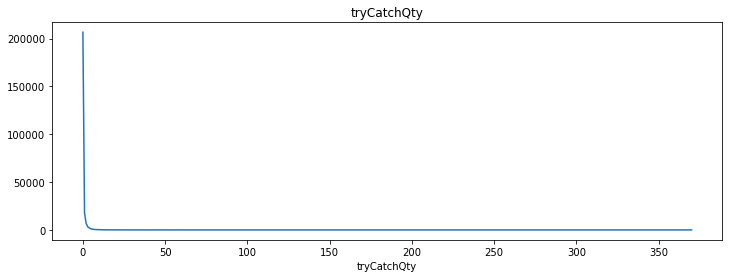

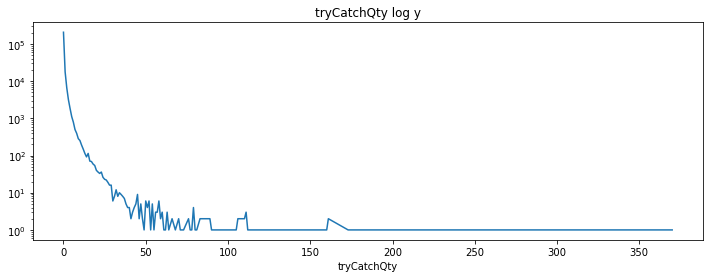

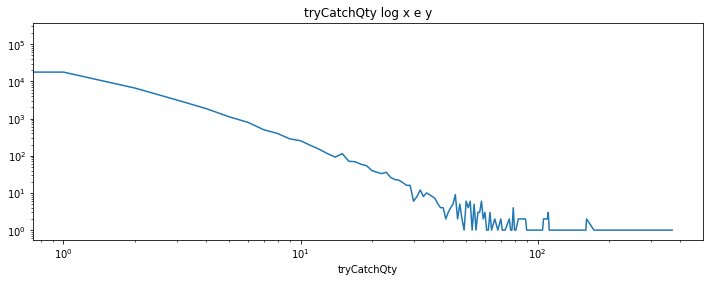

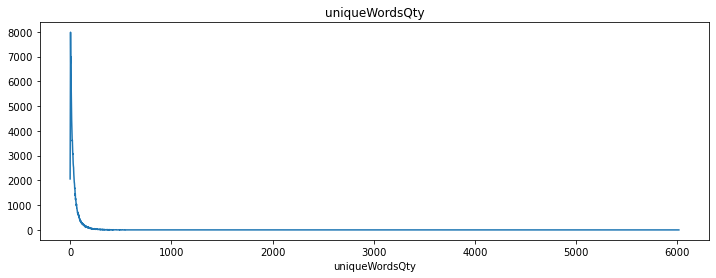

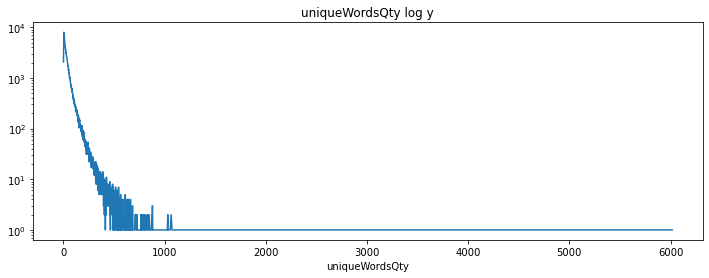

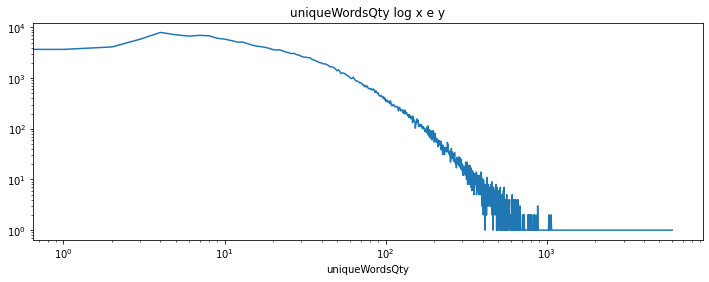

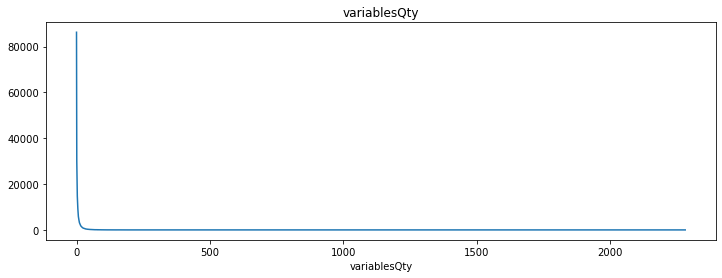

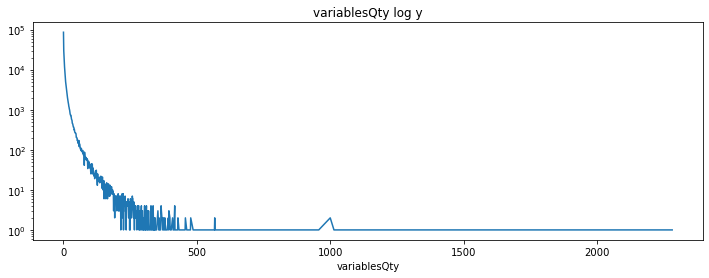

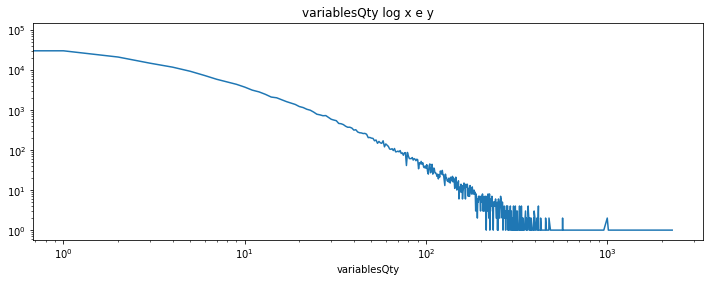

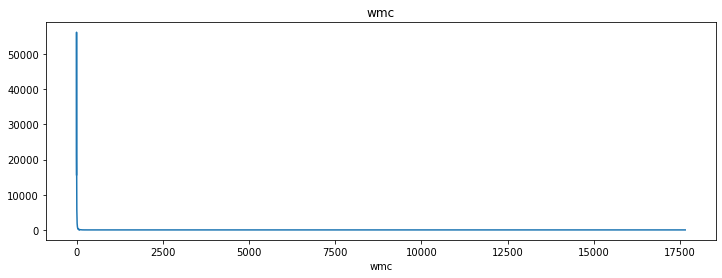

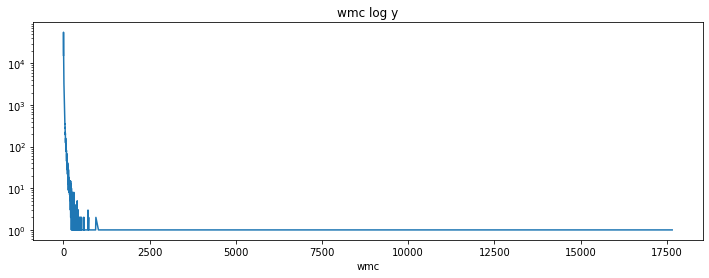

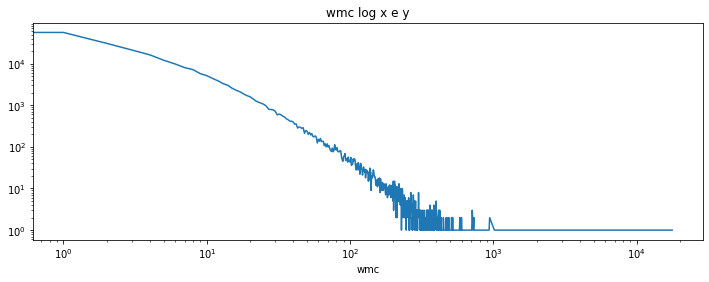

In [4]:
metrics = os.listdir('../../Projetos/Arduino/')
comeco = False
for i in tqdm(range(len(metrics))):
    metric = metrics[i].replace('.csv','')
    if(metric == "privateMethodsQty"):
        comeco = True
    if(comeco):
        resultsFind(metric, '../../Projetos/')